# Install Packages & Load Data

## Packages

In [ ]:
# channel attribution analysis and markov modeling
!pip install marketing_attribution_models
!pip install scikit-plot
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 38.1 MB 76.7 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=2a483b4265140ef194f254c084df95034070b884d5fed4f4b2751f8ff2db7291
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from marketing_attribution_models import MAM

%matplotlib inline

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import sklearn.metrics as metrics
import scikitplot as skplt
import dalex as dx

## Load Data & Profiling

In [ ]:
# Load Data
df_olcd = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_closed_deals_dataset.csv')
df_olqld = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_marketing_funnel_dataset/olist_marketing_qualified_leads_dataset.csv')
df_olsd = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv')
df_olid = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv')

In [ ]:
# Join all dataframe using mql_id & seller_id
df_olist = df_olcd.set_index('mql_id').join(df_olqld.set_index('mql_id')).reset_index()
df_olist = df_olist.set_index('seller_id').join(df_olsd.set_index('seller_id')).reset_index()
df_olist = df_olist.set_index('seller_id').join(df_olid.set_index('seller_id')).reset_index()
df_olist

,seller_id,mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,...,origin,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,00065220becb8785e2cf78355eb9bf68,00dc5000951c268cc8655294daf67b1b,9d12ef1a7eca3ec58c545c678af7869c,de63de0d10a6012430098db33c679b0b,2018-07-10 11:34:50,handcrafted,online_medium,cat,False,False,...,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01266d4c46afa519678d16a8b683d325,ae437864746ae2a9e694a6ed2b5824db,4b339f9567d060bcea4f5136b9f5949e,6565aa9ce3178a5caf6171827af3a9ba,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,...,unknown,80250.0,curitiba,PR,6826d5740591909e368433e2a5ec75fb,1.0,3fc23ad64a8ee1f1451c8c44932c5d22,2018-08-08 16:31:10,9.88,13.47
2,01266d4c46afa519678d16a8b683d325,ae437864746ae2a9e694a6ed2b5824db,4b339f9567d060bcea4f5136b9f5949e,6565aa9ce3178a5caf6171827af3a9ba,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,...,unknown,80250.0,curitiba,PR,d3582fd5ccccd9cb229a63dfb417c86f,1.0,df473738565b52f77b4e22b328b41576,2018-08-22 19:30:05,23.40,15.26
3,01266d4c46afa519678d16a8b683d325,ae437864746ae2a9e694a6ed2b5824db,4b339f9567d060bcea4f5136b9f5949e,6565aa9ce3178a5caf6171827af3a9ba,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,...,unknown,80250.0,curitiba,PR,ed76528f7ed5ae1f2a0dd070a7426d44,1.0,2ad27953852ba0daa0de1213686b7cec,2018-08-23 04:55:37,56.97,18.50
4,013d100f608a64ec8275c038aedeb064,f7066703eb3987f21f0d102ea8caaeb5,a8387c01a09e99ce014107505b92388c,495d4e95a8cf8bbf8b432b612a2aa328,2018-04-06 14:15:21,food_supplement,online_top,NaN,NaN,NaN,...,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,ffc470761de7d0232558ba5e786e57b7,115f08592f4c2bb29013efbbc46608fc,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,...,unknown,7091.0,guarulhos,SP,e88f34a80788f768c175e94c622d7559,1.0,5b685cb0e36ab67e60afdaf2d784e2ed,2018-04-17 19:55:17,30.05,12.79
5502,ffc470761de7d0232558ba5e786e57b7,115f08592f4c2bb29013efbbc46608fc,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,...,unknown,7091.0,guarulhos,SP,e88f34a80788f768c175e94c622d7559,2.0,5b685cb0e36ab67e60afdaf2d784e2ed,2018-04-17 19:55:17,30.05,12.79
5503,ffc470761de7d0232558ba5e786e57b7,115f08592f4c2bb29013efbbc46608fc,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,...,unknown,7091.0,guarulhos,SP,ecb8849b9673c0bc2a510456938b508b,1.0,460a66fcc404a3d7306d5f50fcb2d18a,2018-06-29 14:30:51,24.98,12.84
5504,ffc470761de7d0232558ba5e786e57b7,115f08592f4c2bb29013efbbc46608fc,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,...,unknown,7091.0,guarulhos,SP,f7975233cce5d29114cc23919f1cc8d4,1.0,beb8e018882d56635b77f4a73233c847,2018-04-13 16:30:34,56.90,15.28


In [ ]:
# Check data info
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seller_id                      5506 non-null   object 
 1   mql_id                         5506 non-null   object 
 2   sdr_id                         5506 non-null   object 
 3   sr_id                          5506 non-null   object 
 4   won_date                       5506 non-null   object 
 5   business_segment               5505 non-null   object 
 6   lead_type                      5455 non-null   object 
 7   lead_behaviour_profile         3679 non-null   object 
 8   has_company                    88 non-null     object 
 9   has_gtin                       89 non-null     object 
 10  average_stock                  91 non-null     object 
 11  business_type                  5494 non-null   object 
 12  declared_product_catalog_size  69 non-null     f

In [ ]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in df_olist:
    if df_olist[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(df_olist[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
17,order_id,4512
19,shipping_limit_date,4460
18,product_id,2113
1,mql_id,842
0,seller_id,842
4,won_date,824
12,first_contact_date,195
15,seller_city,166
13,landing_page_id,134
5,business_segment,33


In [ ]:
# Check unique value for object columns
obj_col = ['sr_id', 'business_segment', 'lead_type', 'lead_behaviour_profile', 'has_company', 'has_gtin', 'average_stock', 'origin', 'seller_city', 'seller_state']
for col in obj_col:
    print("="*80)
    print(f"Column: {col}")
    print(df_olist[col].unique())

Column: sr_id
['de63de0d10a6012430098db33c679b0b' '6565aa9ce3178a5caf6171827af3a9ba'
 '495d4e95a8cf8bbf8b432b612a2aa328' '85fc447d336637ba1df43e793199fbc8'
 '068066e24f0c643eb1d089c7dd20cd73' '4ef15afb4b2723d8f3d81e51ec7afefe'
 '56bf83c4bb35763a51c2baab501b4c67' 'fbf4aef3f6915dc0c3c97d6812522f6a'
 '2695de1affa7750089c0455f8ce27021' 'd3d1e91a157ea7f90548eef82f1955e3'
 '9e4d1098a3b0f5da39b0bc48f9876645' '060c0a26f19f4d66b42e0d8796688490'
 '34d40cdaf94010a1d05b0d6212f9e909' '9749123c950bf8363ace42cb1c2d0815'
 'a8387c01a09e99ce014107505b92388c' 'c638112b43f1d1b86dcabb0da720c901'
 '9ae085775a198122c5586fa830ff7f2b' '4b339f9567d060bcea4f5136b9f5949e'
 '9d12ef1a7eca3ec58c545c678af7869c' '6aa3b86a83d784b05f0e37e26b20860d'
 'b90f87164b5f8c2cfa5c8572834dbe3f' '0a0fb2b07d841f84fb6714e35c723075']
Column: business_segment
['handcrafted' 'construction_tools_house_garden' 'food_supplement'
 'household_utilities' 'computers' 'phone_mobile' 'sports_leisure'
 'food_drink' 'home_decor' 'pet' 'audio_video

# Preprocessing

In [ ]:
# change Date columns to Date-type
df_olist['won_date'] = pd.to_datetime(df_olist['won_date'])
df_olist['first_contact_date'] = pd.to_datetime(df_olist['first_contact_date'])

In [ ]:
# general check row and columns
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   seller_id                      5506 non-null   object        
 1   mql_id                         5506 non-null   object        
 2   sdr_id                         5506 non-null   object        
 3   sr_id                          5506 non-null   object        
 4   won_date                       5506 non-null   datetime64[ns]
 5   business_segment               5505 non-null   object        
 6   lead_type                      5455 non-null   object        
 7   lead_behaviour_profile         3679 non-null   object        
 8   has_company                    88 non-null     object        
 9   has_gtin                       89 non-null     object        
 10  average_stock                  91 non-null     object        
 11  business_type    

There is big significant null values on has_company, has_gtin, average_stock, and declared_product_catalog_size. For marketing attribution it didn't affect our analysis so we can go on.

First thing first, we must make revenue and transactions columns. For revenue we can multiply price and amount of ordered item (using order_item_id) per order. And for transactions we using value of order_item_id grouped by seller_id.

In [ ]:
# Make a transactions revenue value
df_olist['totalTransactionsRevenue'] = df_olist['price'] * df_olist['order_item_id']

In [ ]:
# Make a transactions column
df_olist['transactions'] = df_olist['order_item_id'].groupby(df_olist['seller_id']).transform('sum')

Next step, we make aggregated data using grouped data for marketing attribution. We stored the aggregated data into different variable to avoid purity of raw data.

In [ ]:
# Calculate number of transactions and its values based for each user and each channel.
aggregated_data = df_olist.groupby(['seller_id', 'first_contact_date', 'origin'],as_index=False).agg(
    {
        'order_item_id': 'sum',
        'totalTransactionsRevenue': 'sum'
    }
).rename(
    columns={"order_item_id":"transactions"}
).sort_values(by=['transactions'], ascending = False).copy()

aggregated_data.sample(10)

,seller_id,first_contact_date,origin,transactions,totalTransactionsRevenue
482,95081451c156a9d11136ecfc5422a20f,2018-04-20,direct_traffic,0.0,0.00
398,7d7866a99a8656a42c7ff6352a433410,2018-05-10,organic_search,5.0,147.89
112,267116eae2e631a965ef86be260f9278,2018-03-05,organic_search,0.0,0.00
798,f4d969837a2957bb052a71af7d39fc91,2018-03-13,other,0.0,0.00
420,8476243f92442881ddd5b578975cf115,2018-01-04,unknown,12.0,7838.00
766,eaeec4fdcdc91ead735718ae9bebcd8e,2018-03-18,social,0.0,0.00
242,5084f696554075b9a98403b769f31cd5,2018-03-14,unknown,0.0,0.00
583,b494891378bd8f4560abe576c52deacd,2018-05-24,organic_search,24.0,3193.80
337,6c99c983ce3b6ba0ab813e6790e81691,2018-04-11,direct_traffic,9.0,546.75
139,2cb6eb1b7185064167657fa09f541105,2018-01-08,paid_search,8.0,1337.80


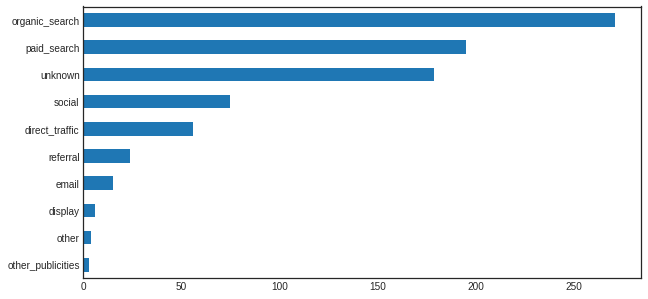

In [ ]:
# Check order distribution based on origin
plt.figure(figsize=(10,5))
aggregated_data['origin'].value_counts(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
aggregated_data.groupby(['origin'], as_index=False).size().sort_values(by=['size'], ascending = False)

,origin,size
3,organic_search,271
6,paid_search,195
9,unknown,179
8,social,75
0,direct_traffic,56
7,referral,24
2,email,15
1,display,6
4,other,4
5,other_publicities,3


From the plot and the summary, we know that most of the customer that interest to Olist are coming from organic_search which is good because organic_search means that customer search about Olist at free will. The problem is the third contribution channel for customer is unknown. So one of the company homework is to identify where these customer comes from in order to separate them to another category to maximize the result of marketing channel attribution.

# Attribution Analysis

Before we using a model to search attribution, perhaps we can use simple analysis in order to make a baseline analysis first. First we can use aggregated data and assign in into different feature

In [ ]:
channel_attribute_value = aggregated_data.assign(
    n_events = 0
).groupby(
    ['origin'], as_index=False
).agg({
    'n_events': 'size', # count of the seller id on channel
    'transactions': 'sum', # total transactions made from channel
    'totalTransactionsRevenue': 'sum', # total revenue comes from channel
    'seller_id' : 'nunique' # total seller on the platforms
}).rename(
    columns={"seller_id":"total_seller"}
).assign(
    revenue_per_conversion = lambda x: x['totalTransactionsRevenue']/x['n_events']
).sort_values(by=['totalTransactionsRevenue'], ascending=False).copy()

In [ ]:
channel_attribute_value

,origin,n_events,transactions,totalTransactionsRevenue,total_seller,revenue_per_conversion
9,unknown,179,1539.0,233629.48,179,1305.192626
3,organic_search,271,1592.0,220707.66,271,814.419410
6,paid_search,195,1746.0,184304.26,195,945.150051
8,social,75,512.0,49996.40,75,666.618667
0,direct_traffic,56,266.0,23871.01,56,426.268036
7,referral,24,95.0,18730.79,24,780.449583
2,email,15,26.0,8521.99,15,568.132667
4,other,4,112.0,7462.25,4,1865.562500
1,display,6,7.0,923.00,6,153.833333
5,other_publicities,3,0.0,0.00,3,0.000000


## Average Revenue per Channel

<Figure size 720x360 with 0 Axes>

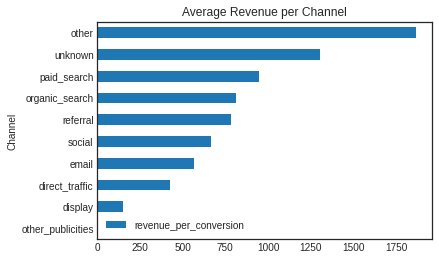

In [ ]:
plt.figure(figsize=(10,5))
channel_attribute_value[['origin', 'revenue_per_conversion']].sort_values(
  by = ['revenue_per_conversion'],
  ascending = True 
).plot(
    x = 'origin', 
    y = 'revenue_per_conversion', 
    kind = 'barh',
    title = 'Average Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Revenue per Conversion'
)
plt.show()

There is a problem in average revenue after looking at the plot above. The problem is the two highest average revenue comes from other and unknown channel. Means that we didn't exactly know where these revenue comes from before deep-dive to the data to determine these sources. The other problem is we know from previous analysis that organic search are the highest source where customer comes from, hence the average revenue still comes from paid search. This means that organic search only bring customer but didn't bring any revenue to the company.

## Conversion per Channel

<Figure size 720x360 with 0 Axes>

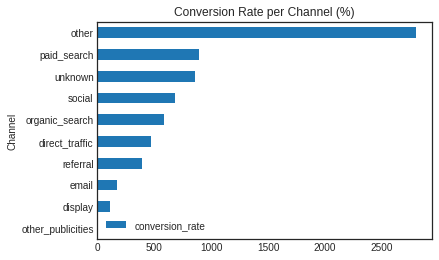

In [ ]:
plt.figure(figsize=(10,5))
channel_attribute_value.assign(
    conversion_rate = lambda x: x['transactions'] * 100/x['total_seller']
).sort_values(
  by = ['conversion_rate'],
  ascending = True 
).plot(
    x = 'origin', 
    y = 'conversion_rate', 
    kind = 'barh',
    title = 'Conversion Rate per Channel (%)',
    xlabel = 'Channel',
    ylabel = 'Conversion Rate'
)
plt.show()

There is also not much we got from convertion rate plot. The highest number is still other channel. And also the organic search dropping rank again to number five after other, paid search, unknown, and social. The company must really consider to research more for these channel.

# Channel Atribution by Model

Next, we try to use a model to find channel attribution. The first we need to do is make a new dataframe using only necessary columns. That is seller_id, first_contact_date, origin, totalTransactionsRevenue, and transactions. Also we will make a columns which value is boolean whether transactions are made or not

In [ ]:
data_for_model = df_olist.drop(['order_id', 'mql_id', 'sdr_id', 'sr_id',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue',
       'won_date', 'landing_page_id',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'order_item_id', 'product_id', 'shipping_limit_date', 'price',
       'freight_value'], axis=1)

After we get our dataframe, we then fill null values using domain knowledge.

* For origin, we simply add unknown since we didn't know where this customer comes from what platform
* For totalTransactionsRevenue and transactions, we fill null values with 0 since all of them are because there is no transactions made.

Then we make a new feature call has_transactions for boolean value like we plan before.

In [ ]:
# fill null on origin to unknown, since we don't know where the seller comes from
data_for_model['origin'].fillna('unknown', inplace=True)

# fill null on revenue and transaction with 0 since the transactions didn't get any revenue
data_for_model['totalTransactionsRevenue'].fillna(0, inplace=True)
data_for_model['transactions'].fillna(0, inplace=True)

# make has_transactions column for customer journey
data_for_model['has_transactions'] = data_for_model.transactions.apply(lambda x: True if x > 0 else False)

In [ ]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   seller_id                 5506 non-null   object        
 1   first_contact_date        5506 non-null   datetime64[ns]
 2   origin                    5506 non-null   object        
 3   totalTransactionsRevenue  5506 non-null   float64       
 4   transactions              5506 non-null   float64       
 5   has_transactions          5506 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 220.6+ KB


Then all the data are ready and clean to use for modelling.

**Heuristic Model**

In [ ]:
attribution = MAM(
    data_for_model, 
    channels_colname='origin',
    group_channels=True, 
    group_channels_by_id_list=['seller_id'], 
    group_timestamp_colname='first_contact_date',
    journey_with_conv_colname='has_transactions',
    create_journey_id_based_on_conversion = True,
    conversion_value='totalTransactionsRevenue'
)

In [ ]:
attribution.attribution_last_click()

(0          [0.0]
 1         [9.88]
 2         [23.4]
 3        [56.97]
 4          [0.0]
           ...   
 5501     [24.98]
 5502    [174.74]
 5503      [54.9]
 5504      [29.9]
 5505     [245.9]
 Length: 5506, dtype: object, channels
 direct_traffic        23871.01
 display                 923.00
 email                  8521.99
 organic_search       220707.66
 other                  7462.25
 other_publicities         0.00
 paid_search          184304.26
 referral              18730.79
 social                49996.40
 unknown              234872.08
 Name: value, dtype: float64)

In [ ]:
attribution.attribution_first_click()

(0          [0.0]
 1         [9.88]
 2         [23.4]
 3        [56.97]
 4          [0.0]
           ...   
 5501     [24.98]
 5502    [174.74]
 5503      [54.9]
 5504      [29.9]
 5505     [245.9]
 Length: 5506, dtype: object,
             channels  attribution_first_click_heuristic
 0     direct_traffic                           23871.01
 1            display                             923.00
 2              email                            8521.99
 3     organic_search                          220707.66
 4              other                            7462.25
 5  other_publicities                               0.00
 6        paid_search                          184304.26
 7           referral                           18730.79
 8             social                           49996.40
 9            unknown                          234872.08)

In [ ]:
attribution.attribution_linear()

(0          [0.0]
 1         [9.88]
 2         [23.4]
 3        [56.97]
 4          [0.0]
           ...   
 5501     [24.98]
 5502    [174.74]
 5503      [54.9]
 5504      [29.9]
 5505     [245.9]
 Length: 5506, dtype: object,
             channels  attribution_linear_heuristic
 0     direct_traffic                      23871.01
 1            display                        923.00
 2              email                       8521.99
 3     organic_search                     220707.66
 4              other                       7462.25
 5  other_publicities                          0.00
 6        paid_search                     184304.26
 7           referral                      18730.79
 8             social                      49996.40
 9            unknown                     234872.08)

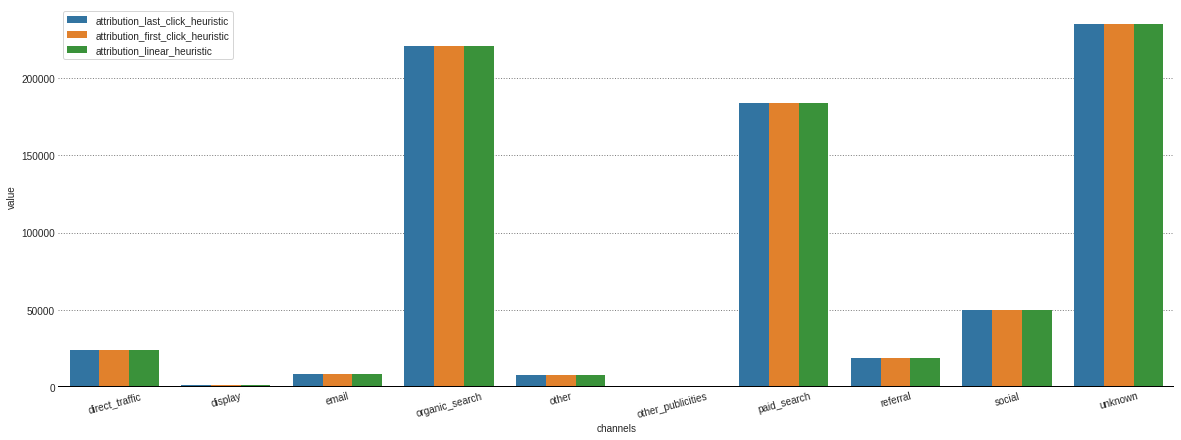

In [ ]:
attribution.plot(model_type='heuristic');

From the plot above we know that the three channel with highest contribution for revenue is unknown, organic_search, and paid_search. What we must highlight from these is that other channel are turning upside down on rank by model. Also the organic search boosted up to rank 2 surpass the paid search, this is need more research about the inconsistency between baseline and model results.

**Markov Model**

In [ ]:
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

In [ ]:
# check markov results
markov_results[1]

,channels,attribution_markov_algorithmic
0,organic_search,220707.66
1,email,8521.99
2,unknown,234872.08
3,other,7462.25
4,paid_search,184304.26
5,direct_traffic,23871.01
6,other_publicities,0.00
7,referral,18730.79
8,display,923.00
9,social,49996.40


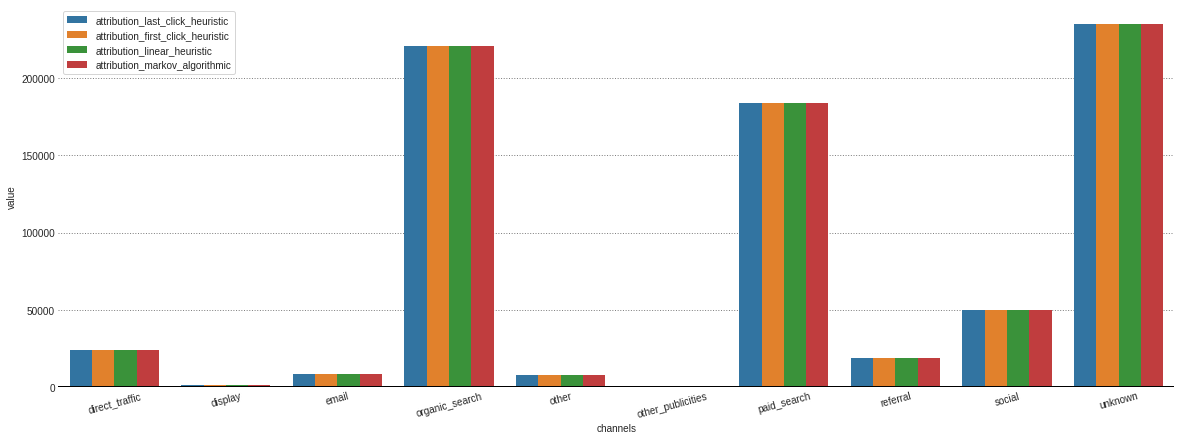

In [ ]:
attribution.plot();

From the plot we know that there are exactly same ranking in term of markov algorithm in determine the rank of the attribution effects.

**Removal Effect**

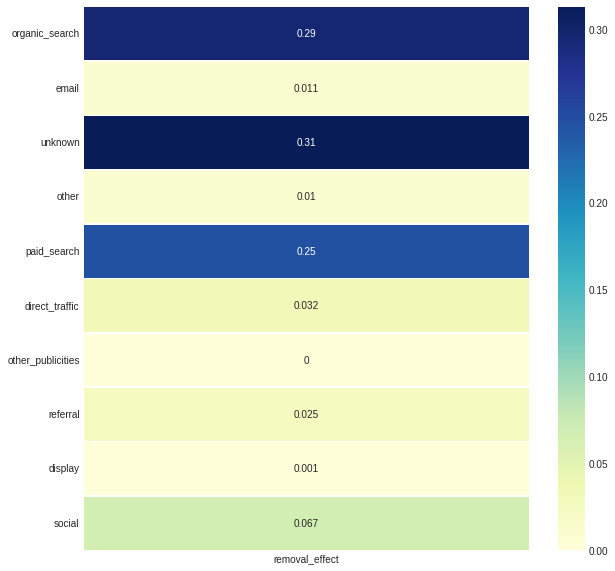

In [ ]:
# check removal effects
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

From the plot above, we know that three highest removal effects are unknown (31%), organic_search(29%), paid_search(25%). While the lowest are other_publicities(0%), display(0.1%), other (1%).

# Conclusion and Recommendation ( Marketing Attribution )

From the analysis above, we can conclude that :

1. The highest contribution of revenue comes from unknown, organic search, and paid search channels. But we **can't** determine first, last, and linear attribution because the data are **non-transactional data**. Hence, we still can use the analysis to know the performance of marketing channel.
2. The three most valuable channel to keep is unknown, organic search, and paid search (more than 25% revenue lost if removed). And the channel we could probably ignore or leave is other publicities, display, and other (around 1% revenue lost if removed). Also if we decide to merge the result of other and other publicities, one next channel we could remove is email since it just around 1% revenue lost if removed.

Also we could make recommendation action plan to the company :
1. Make sure the identification unknown, other, and other publicity channel customer. This is important because the significancy of the results (unknown channel mostly) to the revenue of the company. If we know the channel of these customer we could separate them into more identificable channel to maximize the attribution of the channel.
2. The company need to upgrade the organic search (by doing free promotions like community campaign, social activity, and another free campaign) in order to raise awareness of the people and furthermore maximize company average revenue in which have inconsistency betweeen model and basic analysis.

# Predicting Deals

## Profilling

In [ ]:
# Drop unnecessary data and keep business marketing data
data_for_predict = df_olist.drop(['seller_id', 'mql_id', 'sdr_id', 'sr_id',
       'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue',
       'landing_page_id',
       'seller_zip_code_prefix', 'order_id',
       'order_item_id', 'product_id', 'shipping_limit_date', 'price',
       'freight_value', 'totalTransactionsRevenue', 'transactions'],axis=1)

In [ ]:
data_for_predict

,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,first_contact_date,origin,seller_city,seller_state
0,2018-07-10 11:34:50,handcrafted,online_medium,cat,False,False,2018-03-26,paid_search,NaN,NaN
1,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,2018-05-07,unknown,curitiba,PR
2,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,2018-05-07,unknown,curitiba,PR
3,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,2018-05-07,unknown,curitiba,PR
4,2018-04-06 14:15:21,food_supplement,online_top,NaN,NaN,NaN,2018-01-22,organic_search,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5501,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,2018-01-15,unknown,guarulhos,SP
5502,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,2018-01-15,unknown,guarulhos,SP
5503,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,2018-01-15,unknown,guarulhos,SP
5504,2018-02-14 11:48:29,construction_tools_house_garden,online_big,NaN,NaN,NaN,2018-01-15,unknown,guarulhos,SP


In [ ]:
# change Date columns to Date-type
data_for_predict['won_date'] = pd.to_datetime(data_for_predict['won_date'])
data_for_predict['first_contact_date'] = pd.to_datetime(data_for_predict['first_contact_date'])

# take only date of won_date
data_for_predict['won_date'] = data_for_predict['won_date'].dt.date
data_for_predict['won_date'] = pd.to_datetime(data_for_predict['won_date'])

Then we re-changing the date column into datetime types.

In [ ]:
# Check unique value for object columns
obj_col = ['business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'origin',
       'seller_city', 'seller_state']
for col in obj_col:
    print("="*80)
    print(f"Column: {col}")
    print(data_for_predict[col].unique())

Column: business_segment
['handcrafted' 'construction_tools_house_garden' 'food_supplement'
 'household_utilities' 'computers' 'phone_mobile' 'sports_leisure'
 'food_drink' 'home_decor' 'pet' 'audio_video_electronics' 'health_beauty'
 'fashion_accessories' 'stationery' 'bed_bath_table' 'car_accessories'
 'party' 'bags_backpacks' 'books' 'home_appliances' 'toys'
 'games_consoles' 'music_instruments' 'watches' 'air_conditioning'
 'small_appliances' 'baby' 'home_office_furniture' 'jewerly' 'perfume'
 'other' 'gifts' nan 'religious']
Column: lead_type
['online_medium' 'online_small' 'online_top' 'offline' 'online_beginner'
 'online_big' 'industry' nan 'other']
Column: lead_behaviour_profile
['cat' nan 'wolf' 'eagle' 'shark' 'eagle, cat' 'cat, wolf' 'shark, wolf'
 'shark, cat' 'eagle, wolf']
Column: has_company
[False nan True]
Column: has_gtin
[False nan True]
Column: origin
['paid_search' 'unknown' 'organic_search' 'social' 'email'
 'direct_traffic' 'other_publicities' nan 'referral' 'dis

By looking at summary above, we know that the data have large cardinality. In which need a feature engineering to simplify the data.

## Preprocessing

For this chance we want to predict which deals that actually make customer converted. To identify which deals that actually convert customer we using won_date and first_contact_date. With assuming that the first deal is the deal that makes customer convert, we determine the converted customer in which have same date between first_contact_date (date customer contact) and won_date (date customer convert). Because the first deals can be use as base model to search which deals that actually made customer convert.

In [ ]:
# Make columns converted using won date & first contact date
data_for_predict['converted'] = np.where(data_for_predict['won_date']==data_for_predict['first_contact_date'],1,0)
data_for_predict['converted'].value_counts()

0    4792
1     714
Name: converted, dtype: int64

After making the converted column we found that the data have imbalance which is we can't using accuracy for metrics model.

In [ ]:
#cek missing value -> Mendeteksi missing value menggunakan NA
missing_data = data_for_predict.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(data_for_predict.shape[0]-missing_data['missing values'])/data_for_predict.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,has_company,5418,1.598256
1,has_gtin,5417,1.616418
2,lead_behaviour_profile,1827,66.818017
3,seller_city,462,91.609154
4,seller_state,462,91.609154
5,lead_type,51,99.073738
6,origin,21,99.618598
7,business_segment,1,99.981838
8,won_date,0,100.000000
9,first_contact_date,0,100.000000


From summary above, the data have so many missing values. So we need to clean this before going to modelling phase. As for the strategy, we could using these :

* For missing values around 0~10% , we drop the rows of missing values
* For missing values on lead behaviour profile, we fill the missing values with "other". The reason is because the null values can be because of the sales representatives couldn't identify the behaviour of the seller. It can be because of ambiguous behaviour or simply the representative didn't know about classification
* For missing values has company and has gtin, we drop the columns since there are only less than 2% data has been filled

In [ ]:
# Drop the rows
data_for_predict = data_for_predict.dropna(axis=0, subset=['seller_city', 'seller_state', 'lead_type', 'origin', 'business_segment'])

# Fill with other
data_for_predict['lead_behaviour_profile'] = data_for_predict['lead_behaviour_profile'].fillna('other')

# Fill with False
data_for_predict = data_for_predict.drop(['has_company', 'has_gtin'],axis=1)

In [ ]:
#cek missing value -> Mendeteksi missing value menggunakan NA
missing_data = data_for_predict.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(data_for_predict.shape[0]-missing_data['missing values'])/data_for_predict.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,won_date,0,100.0
1,business_segment,0,100.0
2,lead_type,0,100.0
3,lead_behaviour_profile,0,100.0
4,first_contact_date,0,100.0
5,origin,0,100.0
6,seller_city,0,100.0
7,seller_state,0,100.0
8,converted,0,100.0


In [ ]:
data_for_predict['converted'].value_counts()

0    4287
1     698
Name: converted, dtype: int64

Now the data has been clean and the imbalance problem didn't seem to change. Hence, we can continue to feature engineering phase.

## Model Preparation

In [ ]:
data_for_predict.sample(10)

,won_date,business_segment,lead_type,lead_behaviour_profile,first_contact_date,origin,seller_city,seller_state,converted
351,2018-03-27,computers,online_medium,wolf,2018-03-02,unknown,varzea paulista,SP,0
2082,2018-02-08,pet,online_small,other,2018-01-16,social,rio de janeiro,RJ,0
2689,2018-02-08,watches,online_big,other,2018-01-22,unknown,ribeirao preto,SP,0
5315,2018-05-16,health_beauty,online_big,eagle,2018-04-04,other,guarulhos,SP,0
4001,2018-03-13,health_beauty,online_medium,shark,2018-03-13,paid_search,hortolandia,SP,1
471,2018-06-14,audio_video_electronics,online_beginner,wolf,2018-02-04,paid_search,guaira,SP,0
408,2018-02-19,construction_tools_house_garden,industry,eagle,2018-02-15,unknown,sao paulo,SP,0
1845,2018-02-07,health_beauty,online_medium,other,2018-02-02,unknown,nova iguacu,RJ,0
3136,2018-03-12,bed_bath_table,online_big,cat,2018-02-27,organic_search,presidente prudente,SP,0
3122,2018-03-12,bed_bath_table,online_big,cat,2018-02-27,organic_search,presidente prudente,SP,0


In [ ]:
data_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4985 entries, 1 to 5505
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   won_date                4985 non-null   datetime64[ns]
 1   business_segment        4985 non-null   object        
 2   lead_type               4985 non-null   object        
 3   lead_behaviour_profile  4985 non-null   object        
 4   first_contact_date      4985 non-null   datetime64[ns]
 5   origin                  4985 non-null   object        
 6   seller_city             4985 non-null   object        
 7   seller_state            4985 non-null   object        
 8   converted               4985 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 389.5+ KB


In [ ]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in data_for_predict:
    if data_for_predict[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(data_for_predict[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
4,seller_city,165
0,business_segment,29
5,seller_state,13
3,origin,9
1,lead_type,7
2,lead_behaviour_profile,7


As we can see on summary above, the data have 6 columns with high cardinality. For this, we decide to use frequency encoding to solve the problem. Also this encoding will be use after train-test-split in order to avoid data leaking. We also drop the date columns since most likely didn't really used to predict the deals.

In [ ]:
# Assign 'converted' column to y 
y = data_for_predict['converted']
# Assign all columns except 'converted' to X
X = data_for_predict.drop(['converted', 'won_date', 'first_contact_date'], axis = 1)

In [ ]:
# split data to train and test data
# with test size is 20% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Frequency Encoding for high cardinality columns in data train
col_freq = ['seller_city', 'business_segment', 'seller_state', 'origin', 'lead_type', 'origin', 'lead_behaviour_profile']
for col in col_freq:
  fe = X_train.groupby(col).size()/len(X_train)
  X_train.loc[:, col] = X_train[col].map(fe)

# Frequency Encoding for high cardinality columns in data test
col_freq = ['seller_city', 'business_segment', 'seller_state', 'origin', 'lead_type', 'origin', 'lead_behaviour_profile']
for col in col_freq:
  fe = X_test.groupby(col).size()/len(X_test)
  X_test.loc[:, col] = X_test[col].map(fe)

In [ ]:
X_train

,business_segment,lead_type,lead_behaviour_profile,origin,seller_city,seller_state
429,0.167252,0.372618,0.378636,0.262036,0.002758,0.710632
4443,0.113089,0.015547,0.378636,0.262036,0.002257,0.710632
5460,0.088766,0.403210,0.347793,0.262036,0.003511,0.710632
1504,0.032849,0.403210,0.378636,0.287864,0.003511,0.036108
1013,0.088766,0.403210,0.347793,0.287864,0.004514,0.710632
...,...,...,...,...,...,...
4984,0.088766,0.403210,0.144433,0.287864,0.023320,0.036861
3132,0.038616,0.372618,0.378636,0.262036,0.021815,0.710632
4517,0.055165,0.403210,0.347793,0.262036,0.206620,0.710632
5040,0.088766,0.403210,0.144433,0.287864,0.023320,0.036861


In [ ]:
X_test

,business_segment,lead_type,lead_behaviour_profile,origin,seller_city,seller_state
2562,0.120361,0.384152,0.345035,0.283852,0.133400,0.699097
389,0.057172,0.053159,0.165496,0.283852,0.207623,0.699097
1695,0.039117,0.384152,0.371113,0.259779,0.030090,0.049147
4685,0.044132,0.384152,0.371113,0.259779,0.207623,0.699097
5486,0.057172,0.384152,0.345035,0.283852,0.048144,0.699097
...,...,...,...,...,...,...
55,0.044132,0.380140,0.165496,0.259779,0.012036,0.699097
852,0.006018,0.380140,0.345035,0.259779,0.015045,0.047141
5498,0.057172,0.384152,0.345035,0.283852,0.048144,0.699097
132,0.041123,0.380140,0.371113,0.283852,0.001003,0.699097


After encoding process, the data will be ready for modelling

## Modelling

For this chance, we tried to use random forest modelling. Also we tried to tuning the model using grid search.

In [ ]:
# define Random Forest model
rf = RandomForestClassifier(random_state=1000)
# fit model to data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [ ]:
# predict
pred_result = rf.predict(X_test)
pred_proba_result = rf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not converted','converted'], output_dict=True))

,not converted,converted,accuracy,macro avg,weighted avg
precision,0.943771,0.988889,0.947844,0.966330,0.950106
recall,0.998833,0.635714,0.947844,0.817274,0.947844
f1-score,0.970522,0.773913,0.947844,0.872217,0.942914
support,857.000000,140.000000,0.947844,997.000000,997.000000


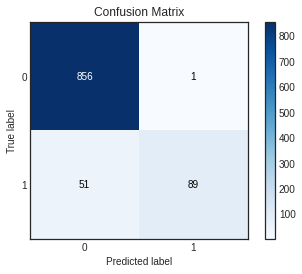

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

The confusion matrix show :

* The model predicted converted and the seller actually converted is 89 (True Positive)
* The model predicted not converted and the seller actually converted is 51 (False Negative)
* The model predicted converted and the seller actually not converted is 1 (False Positive)
* The model predicted not converted and the customer actually not converted is 856 (True Negative)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


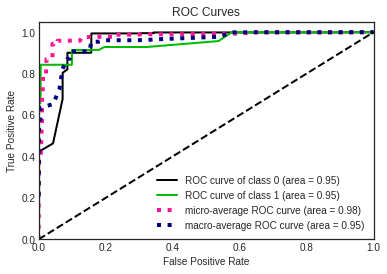

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

The model succeed to distinct between True Positive and True Negative with chance 95%

In [ ]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.773913043478261

The harmony between precision and recall score of the best model is 77.39%

## Imbalance Modelling using G-Means

After we doing a normal model analysis. Then we should try modelling using G-Means to handle imbalanced data set.

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.36, G-Mean=0.9153904394352362


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

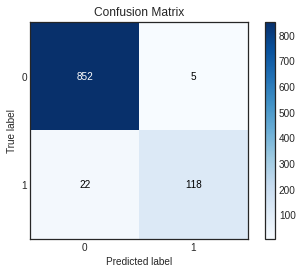

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

The confusion matrix show :

* The model predicted converted and the seller actually converted is 118 (True Positive)
* The model predicted not converted and the seller actually converted is 22 (False Negative)
* The model predicted converted and the seller actually not converted is 5 (False Positive)
* The model predicted not converted and the customer actually not converted is 852 (True Negative)

In [ ]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.773913043478261

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, new_pred_result)

0.897338403041825

The harmony between precision and recall score of the best model is improved from 77.39% into 89.73% ( **raise 12.34%** )

## Model Interpretation

In [ ]:
## initiate explainer for RF model
conv_rf_exp = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 3988 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3988 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fa13857ddd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.14, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.11, mean = -0.000206, max = 0.44
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# visualize permutation feature importance for Random Forest model
conv_rf_exp.model_parts().plot()

From the variable importance, we know that the three highest importance features are business_segment, seller_city, and lead_behaviour_profile.

In [ ]:
df_olist['business_segment'].value_counts()

health_beauty                      869
watches                            599
household_utilities                588
home_decor                         513
construction_tools_house_garden    355
audio_video_electronics            308
pet                                299
car_accessories                    211
bed_bath_table                     200
sports_leisure                     190
bags_backpacks                     148
computers                          147
home_appliances                    143
toys                               131
food_supplement                    120
books                              111
home_office_furniture               93
small_appliances                    74
fashion_accessories                 73
food_drink                          66
stationery                          66
phone_mobile                        64
baby                                46
music_instruments                   30
handcrafted                         20
gifts                    

# Conclusion and Recommendation ( Predicting Deals )

After the analysis, we can conclude that business segment, seller city, and lead behaviour profile is most important things that makes leads converted. Therefore, we can make a campaign that focused on these features like :

1. Segmented offers, after we determine which segment are the most contribute for convert leads, we can abuse many campaign marketing on these area. For example health and beauty, woman usually like things like buy one get one or new product discount for their health care. So we can focused offer on this segment to woman on a pay day sales.

2. City oriented campaign, different city mostly makes different environment of people. So the company can make an campaign based on seller city. Take an example on high-degree temperature city can make an offer on air conditioning segment.

3. For lead behaviour profile, rather than make a campaign, the company can focused on making attractive promotions. Since olist makes so many landing page, company can make landing page different and segmented based on source of the leads.